# HDS5210 Final

This final examination is similar in scale to the midterm from several weeks ago, but covers the scope of the entire semester.  The final also attempts to create a real-world scenario that you might encounter as a data scientist is the field.  Our goal with this final is to compile the data required to be able to understand any possible relationship between population, population density, and the spread of the COVID-19 coronavirus.  As in may real world cases, all of the data you need to do this analysis is not in one place, nicely formatted and compiled for you.  Through the final, you'll collect data from multiple sources and build your analytic dataset in a process that is documented, automated, and reproducable.

<img style='float:right' width='480px' src='https://www.lucidchart.com/publicSegments/view/095390af-7150-4dae-ac06-b98f10463cc7/image.png'>

The data you need for this final is all publicly available and real data.  The three data sources that you are reuquired to use are described in the list below and in the relationship diagram to the right.

* **Corona Virus Testing and Death Reports** - A MySQL database table that I loaded data into from the JSON file below.

 `https://coronadatascraper.com/timeseries.json`

 `corona_counts`
 
* **Location Metadata** -- A JSON file from the Corona Data Scrapper project that has a mapping of location identifiers to the location information.

 `https://coronadatascraper.com/locations.json`

* **Census Information** - Information available on Wikipedia about the population and geographic size of the counties in Missouri. 

 `https://en.wikipedia.org/wiki/List_of_counties_in_Missouri`

*Note that ALL of the data above is real data.  We'll be doing some analysis that is not necessarily standard for epidemiological studies, but should be interesting nonetheless.*

You will be asked to solve a number of different problems using this data.  As in previous assignments, there will be `assert()` statements to help you validate your work along the way.  We'll try to use old enough data so that the numbers shouldn't be changing, but it's possible that some of the data we use will be restated.


In [169]:
CORONA_COUNTS = 'corona_counts'
LOCATION_INFO = 'https://coronadatascraper.com/locations.json'
CENSUS_INFO = 'https://en.wikipedia.org/wiki/List_of_counties_in_Missouri'

# PART 1 - Get information about Missouri Counties

The **Corona Virus Testing and Death Reports** data is all in one place thanks to the work of the Corona Data Scraper project.  However, the data uses its own internal coding system to number the locations and the only reference data they have simply links those locations to [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) codes for US Counties.  Not very helpful.

Therefore, our first step will be to find somewhere that lists the FIPS code for every county in Missouri.  Thank you Wikipedia!  In fact, not only does our source have a mapping from FIPS code to county name, but it also has the population and physical area data that we also want.  So, let's start by retrieving that data from the HTML table on the ["List of counties in Missouri"](https://en.wikipedia.org/wiki/List_of_counties_in_Missouri) page.

Create a function named `get_mo_counties()` that pulls the information from this table and returns a dictionary keyed off the FIPS code and contains an entry for each of the attributes in the table.  Keep at least the elements we need: FIPS code, County, Population, Area as shown in the example below:

```
{ '001':
  { 'county': 'Adair County',
    'population': 25607,
    'area': 568
  },
  '002':
  { 'county': 'Andrew County',
    'population': 17291,
    'area': 435
  },
...
```

### TIPS

1. If you want to take a number and format it with leading 0s, this works: `"{:03d}".format(1)`

2. The Area column in this table uses a "non-breaking space" character between the number part and the "sq mi" part.  This is different than just the space bar.  If you want to tell Python to look for a non-breaking space, you can type `\xa0`

In [170]:
from bs4 import BeautifulSoup
import requests as req

# read the html document from the web address
html_doc =  req.get(CENSUS_INFO)
# selecting `lxml` parser
soup = BeautifulSoup(html_doc.content, 'lxml')

In [171]:
# finding all locations
# each location is expressed as an `a` tag
# with class `external text`
nums = soup.findAll("a", {"class": "external text"})
n = []
for num in nums:
    try:
        # convert the location to number
        # before storing in dict
        if type(int(num.text)) == int:
            n.append(num.text)
    except:
        break
print(n)

['001', '003', '005', '007', '009', '011', '013', '015', '017', '019', '021', '023', '025', '027', '029', '031', '033', '035', '037', '039', '041', '043', '045', '047', '049', '051', '053', '055', '057', '059', '061', '063', '065', '067', '069', '071', '073', '075', '077', '079', '081', '083', '085', '087', '089', '091', '093', '095', '097', '099', '101', '103', '105', '107', '109', '111', '113', '115', '117', '121', '123', '125', '127', '119', '129', '131', '133', '135', '137', '139', '141', '143', '145', '147', '149', '151', '153', '155', '157', '159', '161', '163', '165', '167', '169', '171', '173', '175', '177', '179', '181', '183', '185', '187', '189', '510', '186', '195', '197', '199', '201', '203', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '227', '229']


In [172]:
# Below we are finding the population and
# area. Both of them have been expressed with the same
# tag, `td`. However, they are expressed alternatively.
# example, the first data is population, the second is area
# third is again population, and fourth is area. It goes on this way

# So we use counter which starts with 1 (it is immediately incremented from 0 to 1)
# it checks whether the counter is even or odd.
# if it was odd, then this data is for population
# otherwise it is for area
cont = soup.findAll("td")
pop, areas = [], []
tempNum = 0
for c in cont:
    tempNum += 1
    if c.span:
        try:
            # replace the comma in the number so that we can convert it
            val = c.span.text.replace(",", "")
            # if it is a decimal, i.e., it contains a dot `.`, then
            # it is converted to float otherwise it is converted to an int
            if val.find(".") == -1:
                val = int(val)
            else:
                val = float(val)
        except ValueError:
            break
        # appending to area, when counter is even
        # apeending to population when counter is odd
        if tempNum % 2 == 0:
            areas.append(val)
        else:
            pop.append(val)
print(pop)
print(areas)

[25607, 17291, 5685, 25529, 35597, 12402, 17049, 19056, 12363, 162642, 89201, 42794, 9424, 44332, 44002, 75674, 9295, 6265, 99478, 13982, 7831, 77422, 7139, 221939, 20743, 75990, 17601, 24696, 7883, 16777, 8433, 12892, 15657, 13684, 31953, 101492, 15222, 6738, 275174, 10261, 8957, 22272, 9627, 4912, 10144, 40400, 10630, 674158, 117404, 218733, 52595, 4131, 35571, 33381, 38634, 10211, 52566, 12761, 15195, 15566, 12226, 9176, 28781, 23083, 3785, 24748, 14358, 15607, 8840, 12236, 20565, 18956, 58114, 23370, 10881, 13878, 9723, 18296, 18971, 42201, 45156, 18516, 89322, 31137, 52274, 4979, 10167, 25414, 23494, 6696, 14100, 360485, 9805, 65359, 1000438, 319294, 18145, 23370, 4431, 4843, 39191, 8441, 6373, 29968, 32202, 6714, 51675, 26008, 21159, 32513, 25195, 13521, 36202, 2171, 18815]
[568, 435, 545, 693, 779, 594, 848, 706, 621, 685, 410, 698, 429, 839, 655, 579, 695, 508, 699, 476, 756, 563, 507, 396, 419, 392, 565, 743, 490, 542, 567, 424, 754, 815, 546, 922, 520, 492, 675, 436, 725, 702

In [173]:
# All counties are
# `a` tags which are enclosed in a `th` tag
# also, all of these `th` tags are in `table` tag
counties = soup.find("table", {"class": "wikitable"}).findAll("th")
county = []
for th in counties:
    elem = th.find("a", title=True)
    if elem is not None:
        county.append(elem.text)

print(county)

['Adair County', 'Andrew County', 'Atchison County', 'Audrain County', 'Barry County', 'Barton County', 'Bates County', 'Benton County', 'Bollinger County', 'Boone County', 'Buchanan County', 'Butler County', 'Caldwell County', 'Callaway County', 'Camden County', 'Cape Girardeau County', 'Carroll County', 'Carter County', 'Cass County', 'Cedar County', 'Chariton County', 'Christian County', 'Clark County', 'Clay County', 'Clinton County', 'Cole County', 'Cooper County', 'Crawford County', 'Dade County', 'Dallas County', 'Daviess County', 'DeKalb County', 'Dent County', 'Douglas County', 'Dunklin County', 'Franklin County', 'Gasconade County', 'Gentry County', 'Greene County', 'Grundy County', 'Harrison County', 'Henry County', 'Hickory County', 'Holt County', 'Howard County', 'Howell County', 'Iron County', 'Jackson County', 'Jasper County', 'Jefferson County', 'Johnson County', 'Knox County', 'Laclede County', 'Lafayette County', 'Lawrence County', 'Lewis County', 'Lincoln County', 'L

In [174]:
import pandas as pd

def get_mo_counties(url=CENSUS_INFO):
    
    output = {}
    # wrapping up the scraped data
    for i in range(len(n)):
        output[n[i]] = {
            'county': county[i],
            'population': pop[i],
            'area': areas[i]
        }
    
    return output

In [175]:
mo_counties = get_mo_counties()
assert(len(mo_counties) == 115)
assert(mo_counties.get('001').get('county') == 'Adair County')
assert(mo_counties.get('007').get('population') == 25529)
assert(mo_counties.get('011').get('area') == 594)

In [176]:
len(mo_counties)

115

In [177]:
mo_counties.get('001').get('county')

'Adair County'

In [178]:
mo_counties.get('007').get('population')

25529

In [179]:
mo_counties.get('011').get('area')

594

# PART 2 - Create a List of Missouri Counties from the Corona Data Scraper Locations File

Browse the **Location Metadata** JSON file on the website and you'll see that it is a list that contains a dictionary object for each of the locations for which this website has data.  Create a Python function called `get_mo_locations()` to read that JSON file from the URL provided above and transform that JSON into a simple dictionary that has only those locations that are in Missouri.  We're going to use this dictionary to filter the actual testing and death data file during the next step.  For the structure of that dictionary, it will be most useful if you has the position of the original list entry as the dictionary key and the county's FIPS code as the dictionary value.  The reason for this is that the location identifier in the testing and death data file is the index position for the appropriate location metadata in this file.

You'll notice that the FIPS code from this file includes a 2-digit prefix that has the state code of `29` on it.  You'll need to remove that and only keep the last three characters of the FIPS code so that it matches the three digit FIPS code from the Wikipedia page above.

The output returned from your `get_mo_locations()` function should look like the sample below and ONLY contain **the counties from Missouri**.

```
{1901: '001',
 1902: '003',
 1903: '005',
 1904: '007',
 1905: '009',
 1906: '011',
...
```


In [180]:
import pandas as pd
import requests
import json

def get_mo_locations(url=LOCATION_INFO):
    output = {}
    # retrieve json data from url
    json_data = json.loads(requests.get(url).content)
    counter = 0
    # filter the json. We only need data which have state as `Missouri`
    for location in json_data:
        if "state" in location and location["state"] == "Missouri" and "countyId" in location:
            # slice the string, we need all the characters starting
            # from the third last characters
            output[counter] = location["countyId"][-3:]
        counter += 1
    
    return output

In [181]:
mo_locations = get_mo_locations()
assert(len(mo_locations) == 115)
assert(mo_locations.get(1903) == '001')
# assert(mo_locations.get(1902) == '001')

In [182]:
len(mo_locations)

115

In [183]:
mo_locations.get(1903)

'001'

# PART 3 - Corona Virus Cases for Missouri Counties

Next, we're going to use the data available in the **Corona Virus Testing and Death Reports** data in the MySQL **corona_counts** table.  This data will need to be filtered down to only contain the information for Missouri Counties.

Create a function called `get_corona_counts()` that retrieves retrieves information from the same MySQL database we used before.  I've provided the connection information for your convenience.  Your function will need to make the database connect and retrieve the data from the **corona_counts** table.  It should use the output from the `get_mo_locations()` function to filter the information in the table and return a dataframe with only the data for Missouri counties.

In [184]:
# Then, this code will automatically setup your 
import os
from sqlalchemy import create_engine
import pandas as pd

host = 'slucor2020.cgdcoitnku0k.us-east-1.rds.amazonaws.com'
port = '3306'
user = 'slucor2020'
password = 'SLUcor2020'
database = 'hds5210'

conn = create_engine('mysql+pymysql://' + 
                     user + ':' + 
                     password + '@' + 
                     host + ':' + 
                     str(port) + '/' + 
                     database)

In [185]:
def get_corona_counts(locations, conn, table=CORONA_COUNTS):
    # retrieve from database and store in dataframe
    corona_counts = pd.read_sql_query('SELECT * FROM ' + CORONA_COUNTS + ';', conn)
    # ensure, `location` column data have type `int64`
    corona_counts["location"].astype('int64')
    valid_locations = [ int(x)   for x in locations ]
    
    return corona_counts[corona_counts["location"].isin(valid_locations)]

In [186]:
mo_corona = get_corona_counts(get_mo_locations(), conn)
assert(mo_corona['dt'].value_counts().mean() == 115)
assert(mo_corona['location'].value_counts().mean() == 100)
assert('dt' in mo_corona.columns)
assert('location' in mo_corona.columns)
assert('cases' in mo_corona.columns)

In [187]:
mo_corona['dt'].value_counts().mean()

115.0

In [188]:
mo_corona['location'].value_counts().mean()

100.0

In [189]:
'dt' in mo_corona.columns

True

In [190]:
'location' in mo_corona.columns

True

In [191]:
'cases' in mo_corona.columns

True

## PART 4 - Calculate Doubling Time between 3/1 and 3/31

The next step in our process is to calculate the doubling time for each county.  [Doubling time](https://en.wikipedia.org/wiki/Doubling_time) is calculated by computing:

```
doubling_time = ln(2) / growth_rate
```

where growth rate is calculated by:

```
growth_rate = ln(N(t) / N(0)) / t

N(t) = number at time t
N(0) = number at start time
t    = number of time units (we'll use days)
```

In this part, you should create a function called `calc_doubling_rate()` that takes the dataframe output from your `get_corona_counts()` function and returns four Series (columns): location, cases on start date, cases on end date, and the doubling rate calculated based start and end date that you provide.  You can assume start and end date are strings in the format YYYY-MM-DD.

Special rules:
* If the count at the start or the end is 0 then the doubling_time should be NaN
* If the count on the end date is less than the count on the start date, then the doubling_time should be NaN

Once we have a data frame with only one row per county, we can merge that in with the census information from step 1 and start looking at some relationships.



### TIPS

1. You'll need to calculate some natural logs as shown above.  The way to do that with Pandas requires **`import numpy as np`** and then something like **`np.log2(df['cases'])`**

2. The right way to overwrite some of the rows under a particular column is by using he df.loc(row_indexer, col_indexer) syntax.  For instance, if you have a filter called `my_filter`, then updating the doubling_time column would look like this:  `output.loc[my_filter, 'my_column'] = np.nan`

In [192]:
import numpy as np
from datetime import datetime

def calc_doubling_rate(df, start='2020-04-01', end='2020-04-20'):
    # get all unique locations
    locations = df["location"].unique()
    # initialize dataframe
    doubling = pd.DataFrame({ "location": [], "start": [], "end": [], "doubling_time": [] })
    # setting types
    doubling["location"].astype('int64'); doubling["start"].astype('int64'); doubling["end"].astype('int64')
    rows = 0
    for location in locations:
        # getting number of cases in start and end date
        # of the county data
        county_data = df.loc[df["location"] == location]
        county_start = county_data.loc[county_data["dt"] == start].reset_index()
        county_end = county_data.loc[county_data["dt"] == end].reset_index()
        N_0 = county_start.loc[0, "cases"]
        N_t = county_end.loc[0, "cases"]
        if N_0 == 0 or N_t == 0 or N_t < N_0:
            doubling_time = np.NaN
        else:
            # calculate -
            # doubling_time = ln(2) / growth_rate
            # growth_rate = ln(N(t) / N(0)) / t
            t = (datetime.strptime(end, '%Y-%m-%d').timestamp() - datetime.strptime(start, '%Y-%m-%d').timestamp()) / (24 * 60 * 60)
            growth_rate = np.log(N_t / N_0) / t
            doubling_time = np.log(2) / growth_rate
        # insert the row data
        doubling.loc[rows] = [location, N_0, N_t, doubling_time]
        rows += 1
    return doubling

In [193]:
mo_doubling = calc_doubling_rate(mo_corona)
assert(len(mo_doubling) == 115)
assert(round(mo_doubling['start'].mean(),2) == 13.7)
assert(round(mo_doubling['end'].mean(),2) == 50.37)
assert(round(mo_doubling['doubling_time'].min(),2) == 4.14)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


In [194]:
len(mo_doubling)

115

In [195]:
round(mo_doubling['start'].mean(),2)

13.7

In [196]:
round(mo_doubling['end'].mean(),2)

50.37

In [197]:
round(mo_doubling['doubling_time'].min(),2)

4.14

# Part 5 - Merge the Census and Corona Data

In this step, we'll finally get our corona virus data merged with the location data and then the census data so that we can compare doubling time and population or population density.  To do this, write a function called `merge_corona_census()` that does the merge and returns a single data frame with all of the columns as output.

You will also need to calculate the population density for each as the ration of the population to the area:
```
  density = population / area
```

In [198]:
def merge_corona_census(corona, locations, census):
    # converting census to a datframe which
    # can be used for merging
    county_data = {"location": [], "county": [], "population": [], "area": []}
    for location in locations:
        temp_data = census[locations[location]]
        county_data["location"].append(location); county_data["county"].append(temp_data["county"])
        county_data["population"].append(temp_data["population"]); county_data["area"].append(temp_data["area"])
    county_data = pd.DataFrame(county_data)
    # merging county_data with corona
    output = pd.merge(corona, county_data, on="location")
    output["density"] = output["population"] / output["area"]
    
    return output

In [199]:
results = merge_corona_census(mo_doubling, mo_locations, mo_counties)
assert(len(results) == 115)
assert(round(results['density'].mean(),2) == 131.71)

In [200]:
len(results)

115

In [201]:
round(results['density'].mean(),2)

131.71

# Part 6 Observations

Below, I've provided some code to plot data from your results above.  This assumes that your results include the following columns:
* population
* density
* doubling_time


Take a few minutes and share your observations about the pattern or lack of pattern in the relationship between density, population, and doubling_time.  Put your comments in the text cell below.

---

### Your Response

From the first graph below, we can conclude that population is directly proportional to density

From, the second graph, it is likely that doubling time decreases with density

The Third graph, is also shows that doubling time and population are inversely proportional.
i.e. doubling time decreases with population. This was expected because density and population
are directly proportional

In the fourth graph, when the doubling time decreases and density increases, the spots get darker and bigger in radius. This signifies that, when density increases and population increases, doubling time will decrease.

---

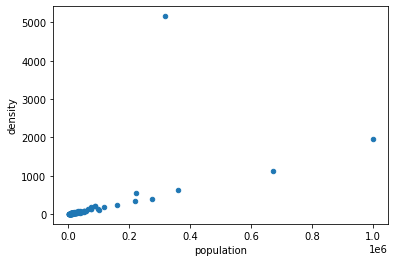

In [202]:
results.plot.scatter(x='population', y='density')

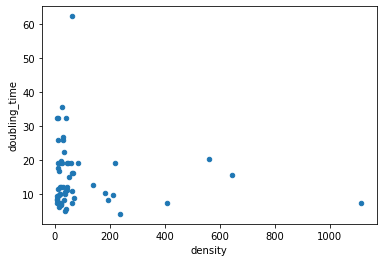

In [203]:
results.plot.scatter(x='density', y='doubling_time')

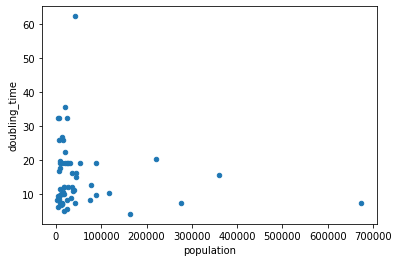

In [204]:
results.plot.scatter(x='population', y='doubling_time')

In [205]:
import seaborn as sns

[None]

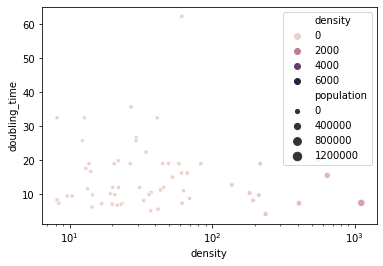

In [206]:
ax = sns.scatterplot(x="density", y="doubling_time",
                     hue="density", size="population",
                     data=results)

ax.set(xscale='log')